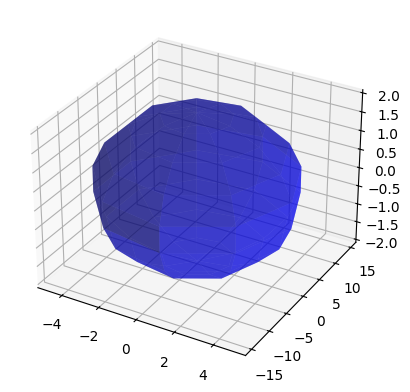

(10, 10)


In [388]:
# for circle
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits import mplot3d

n = 10

theta = np.linspace(0,2*np.pi,n)
phi = np.linspace(0,np.pi,n)

a = 5
b = 15
c = -2

x = a * np.outer(np.cos(theta), np.sin(phi))
y = b * np.outer(np.sin(theta), np.sin(phi))
z = c * np.outer(np.ones(np.size(theta)), np.cos(phi))
# x = k * np.cos(theta) * np.sin(phi)
# y = k * np.sin(theta) * np.sin(phi)
# x,y = np.meshgrid(x,y)
# z = k - x**2 - y**2


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_org = x
y_org = y
z_org = z
ax.plot_surface(x, y, z, color='b', alpha=0.5)
plt.show()

print(x.shape)


(10, 10)
(10, 10)
(10, 10)


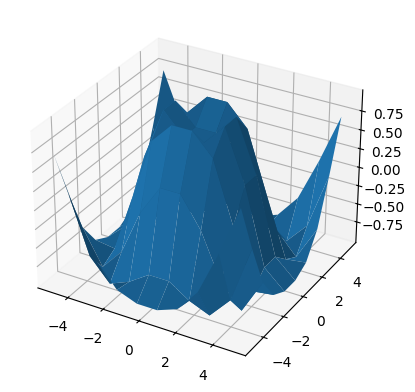

In [389]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


X = np.linspace(-5, 5, n)
Y = np.linspace(-5, 5, n)
X, Y = np.meshgrid(X, Y)
print(X.shape)
print(Y.shape)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print(Z.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z)
plt.show()
x,y,z = X, Y, Z
x_org, y_org, z_org = x,y,z

In [390]:
print(x.shape,y.shape,z.shape)

(10, 10) (10, 10) (10, 10)


In [391]:
X = x.reshape(x.shape[0]*x.shape[1])
Y = y.reshape(y.shape[0]*y.shape[1])
Z = z.reshape(z.shape[0]*z.shape[1])

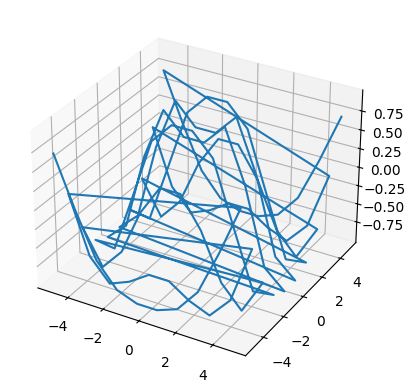

In [392]:
ax = plt.axes(projection = '3d')
ax.plot3D(X,Y,Z)
# plt.show()

In [393]:
inputs = []
for i,j in zip(theta,phi):
    inputs.append([i,j])
inputs = np.array(inputs)
inputs.shape

(10, 2)

In [394]:
# inputs = []
# for i,j in zip(X,Y):
#     inputs.append([i,j])
# inputs = np.array(inputs)
# inputs.shape

In [395]:
outputs = []
for i,j,k in zip(x,y,z):
    outputs.append([i,j,k])
outputs = np.array(outputs)
outputs = outputs.reshape((n,3*n))

In [396]:
import tensorflow as tf

In [397]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(n,activation="leaky_relu"),
    tf.keras.layers.Dense(n,activation="leaky_relu"),
    tf.keras.layers.Conv1D()
    tf.keras.layers.Dense(n,activation="leaky_relu"),
    tf.keras.layers.Dense(3*n,activation="leaky_relu"),
])

In [398]:
model.compile(
    optimizer = "adam",
    # loss = tf.keras.losses.SparseCategoricalCrossentropy,
    loss = tf.keras.losses.MeanSquaredError,
    metrics = ['accuracy','precision']
)

In [399]:
model.fit(inputs,outputs,epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step - accuracy: 0.0000e+00 - loss: 6.9550 - precision: 0.0000e+00
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 6.9450 - precision: 0.0000e+00
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 6.9348 - precision: 0.0000e+00
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 6.9249 - precision: 0.0000e+00
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 6.9159 - precision: 0.0000e+00
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 6.9079 - precision: 0.0000e+00
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 6.8999 - precision: 0.0000e+00
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 6.8920 - precision: 0.0000e+00
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 6.8841 - prec

In [400]:
predictor = model.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [401]:
predictor = predictor.reshape((n,3,n))

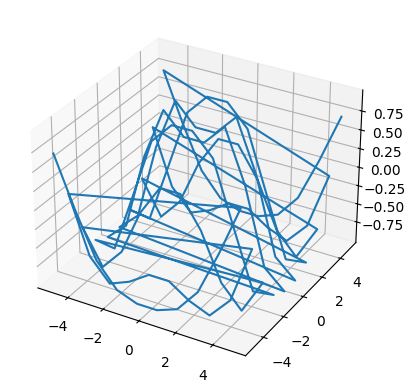

In [402]:
ax = plt.axes(projection = '3d')
ax.plot3D(X,Y,Z)

In [403]:
X = []
Y = []
Z = []
for i,j,k in predictor:
    X.append(i)
    Y.append(j)
    Z.append(k)
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
X_pred = X
Y_pred = Y
Z_pred = Z

(10, 10) (10, 10) (10, 10)


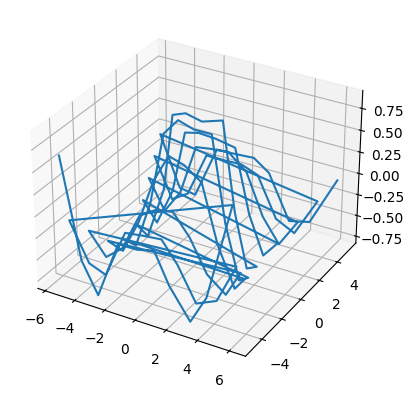

In [404]:
print(X.shape,Y.shape,Z.shape)
X = X.reshape(X.shape[0]*X.shape[1])
Y = Y.reshape(Y.shape[0]*Y.shape[1])
Z = Z.reshape(Z.shape[0]*Z.shape[1])
ax = plt.axes(projection = '3d')
ax.plot3D(X,Y,Z)
ax.plot3D
plt.show()


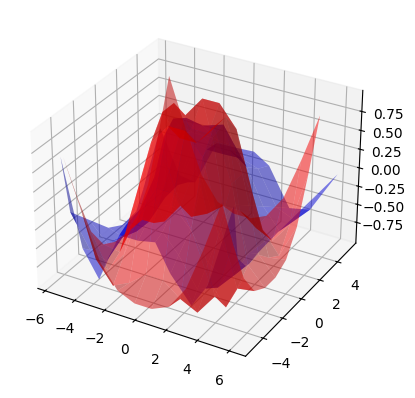

(100,)

In [405]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_org, y_org, z_org, color='r', alpha=0.5)
ax.plot_surface(X_pred, Y_pred, Z_pred, color='b', alpha=0.5)
plt.show()
X.shape